In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [6]:
df = pd.read_csv('../src/data/Reddit_Data.csv')

In [29]:
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37249 entries, 0 to 37248
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   clean_comment  37149 non-null  object
 1   category       37249 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 582.1+ KB


In [31]:
df['category'].value_counts()

 1    15830
 0    13142
-1     8277
Name: category, dtype: int64

Text(0, 0.5, 'Label')

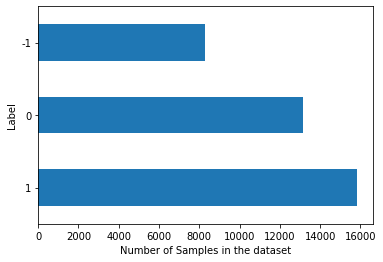

In [32]:
ax = df["category"].value_counts(sort=True).plot(kind='barh')
ax.set_xlabel("Number of Samples in the dataset")
ax.set_ylabel("Label")

In [33]:
df = df.dropna().reset_index(drop=True)

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [36]:
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

In [37]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['clean_comment'])
y = df["category"]

In [38]:
X

<37149x53084 sparse matrix of type '<class 'numpy.float64'>'
	with 843702 stored elements in Compressed Sparse Row format>

In [39]:
y

0        1
1        1
2       -1
3        0
4        1
        ..
37144    0
37145    1
37146    0
37147    1
37148    0
Name: category, Length: 37149, dtype: int64

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [41]:
model = LinearSVC()
model.fit(X,y)

LinearSVC()

In [42]:
y_ = model.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score

In [44]:
accuracy_score(y_,y_test)

0.9871941272430669

In [45]:
t = vectorizer.transform(pd.Series("I am angry about this product."))

In [46]:
model.predict(t)

array([-1])

In [47]:
# save the model to disk
filename = '../src/model/linearsvc_model.pkl'
pickle.dump(model, open(filename, 'wb'))

In [48]:
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9871941272430669


In [49]:
import joblib

In [50]:
pipeline = make_pipeline(vectorizer, model)
joblib.dump(pipeline, '../src/model/pipeline.pkl')

['../src/model/pipeline.pkl']

In [51]:
pipeline = joblib.load('../src/model/pipeline.pkl')

In [53]:
_,xte,_,yte = train_test_split(df['clean_comment'], df['category'],test_size=0.33, random_state=42)
pipeline.score(xte, yte)

0.9871941272430669